# Genetic Algorithm

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from ga import GA
from functions import sphere, rastringin, ackley

## Analisar o impacto dos parâmetros do GA na solução das funções de teste.
* Variar o tamanho da população no intervalo [30 - 100] em passos de 10. 
* Mostrar resultado em um gráfico com tamanho da população vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções (exemplo).

### Sphere

In [2]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(sphere, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [3]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(rastringin, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [4]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(ackley, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

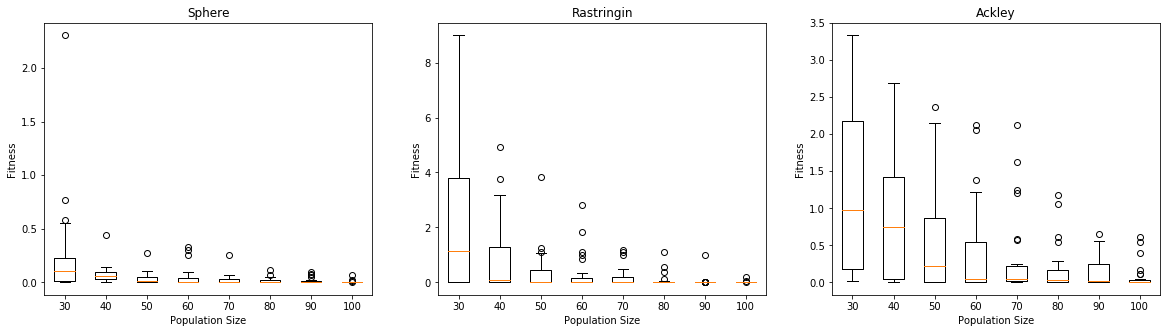

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.show()

# Variar taxa de cruzamento no intervalo [50% - 100%] em passos de 10.
* Mostrar resultado em um gráfico com taxa de cruzamento vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções.


### Sphere

In [6]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(sphere, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
        
    sphere_cross_probability.append(n)
    sphere_results.append(results)

### Rastringin

In [7]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(rastringin, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    rastringin_cross_probability.append(n)
    rastringin_results.append(results)

### Ackley

In [8]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(ackley, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    ackley_cross_probability.append(n)
    ackley_results.append(results)

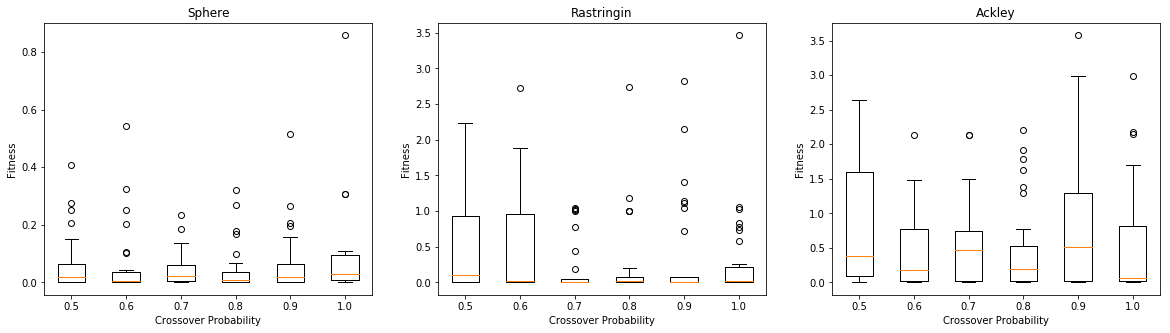

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), np.around(sphere_cross_probability,1))
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), np.around(rastringin_cross_probability,1))
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), np.around(ackley_cross_probability,1))
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.show()

# Variar tipo de cruzamento entre as opções: cruzamento 1 ponto, cruzamento 2 pontos.
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão duas séries neste gráfico, uma para cada tipo de cruzamento
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).


In [8]:
num_gen=100
num_exec=30
x = np.arange(1, num_gen+1, 1) # iteration number array

### Sphere

In [9]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_1 = []
sphere_iter_results_1= [[] for i in range(num_gen)]
sphere_iter_mean_1 = []
sphere_iter_std_1 = []

sphere_best_fitnesses_2 = []
sphere_iter_results_2 = [[] for i in range(num_gen)]
sphere_iter_mean_2 = []
sphere_iter_std_2 = []

ga_1 = GA(sphere, bounds, generations=num_gen)
ga_2 = GA(sphere, bounds, generations=num_gen, cx_strategy='two-point')


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    sphere_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    sphere_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_1)):
    for j in range(len(sphere_best_fitnesses_1[i])):
        sphere_iter_results_1[j].append(sphere_best_fitnesses_1[i][j])
        sphere_iter_results_2[j].append(sphere_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_1)):
    sphere_iter_mean_1.append(np.mean(sphere_iter_results_1[i]))
    sphere_iter_std_1.append(np.std(sphere_iter_results_1[i]))
    
    sphere_iter_mean_2.append(np.mean(sphere_iter_results_2[i]))
    sphere_iter_std_2.append(np.std(sphere_iter_results_2[i]))

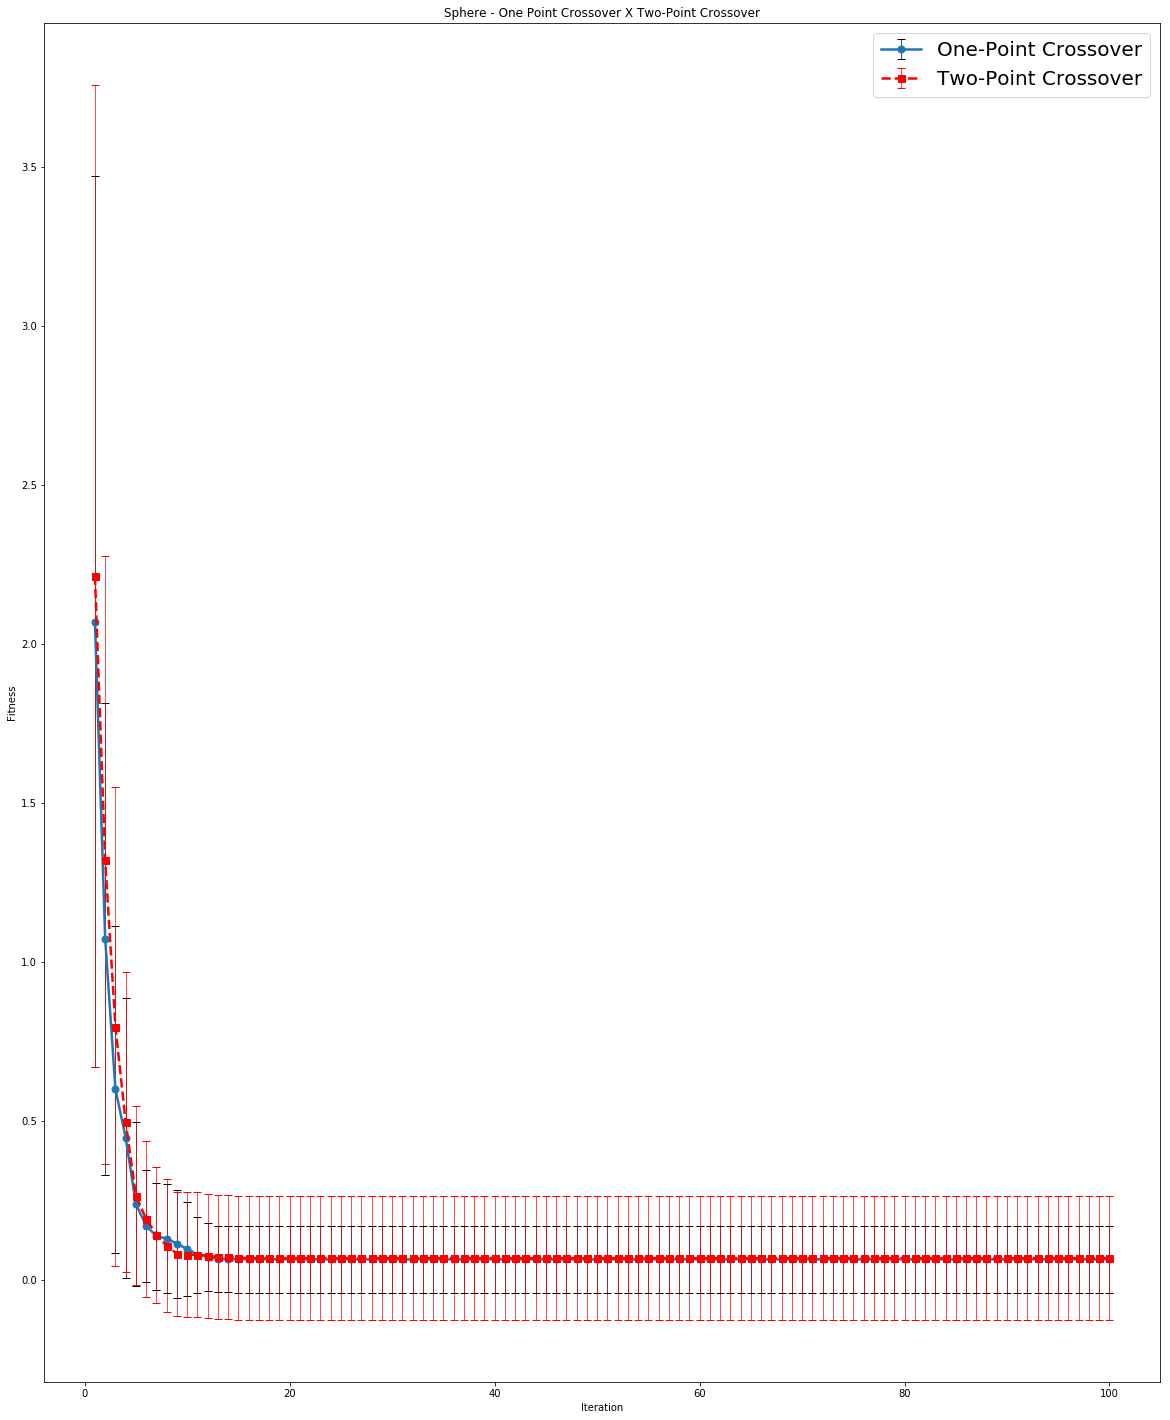

In [12]:
plt.figure(figsize=(20, 25))
plt.errorbar(x, np.array(sphere_iter_mean_1), np.array(sphere_iter_std_1), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label="One-Point Crossover")
plt.errorbar(x, np.array(sphere_iter_mean_2), np.array(sphere_iter_std_2), ms=7,ls="--", lw=2.5, marker="s", capsize=4, ecolor="red",color="r", elinewidth=0.7,label="Two-Point Crossover")
plt.title('Sphere - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})




### Rastringin

In [13]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]
rastringin_best_fitnesses_1 = []
rastringin_iter_results_1= [[] for i in range(num_gen)]
rastringin_iter_mean_1 = []
rastringin_iter_std_1 = []

rastringin_best_fitnesses_2 = []
rastringin_iter_results_2 = [[] for i in range(num_gen)]
rastringin_iter_mean_2 = []
rastringin_iter_std_2 = []

ga_1 = GA(rastringin, bounds, generations=num_gen)
ga_2 = GA(rastringin, bounds, generations=num_gen, cx_strategy='two-point')


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    rastringin_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    rastringin_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_1)):
    for j in range(len(rastringin_best_fitnesses_1[i])):
        rastringin_iter_results_1[j].append(rastringin_best_fitnesses_1[i][j])
        rastringin_iter_results_2[j].append(rastringin_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_1)):
    rastringin_iter_mean_1.append(np.mean(rastringin_iter_results_1[i]))
    rastringin_iter_std_1.append(np.std(rastringin_iter_results_1[i]))
    
    rastringin_iter_mean_2.append(np.mean(rastringin_iter_results_2[i]))
    rastringin_iter_std_2.append(np.std(rastringin_iter_results_2[i]))

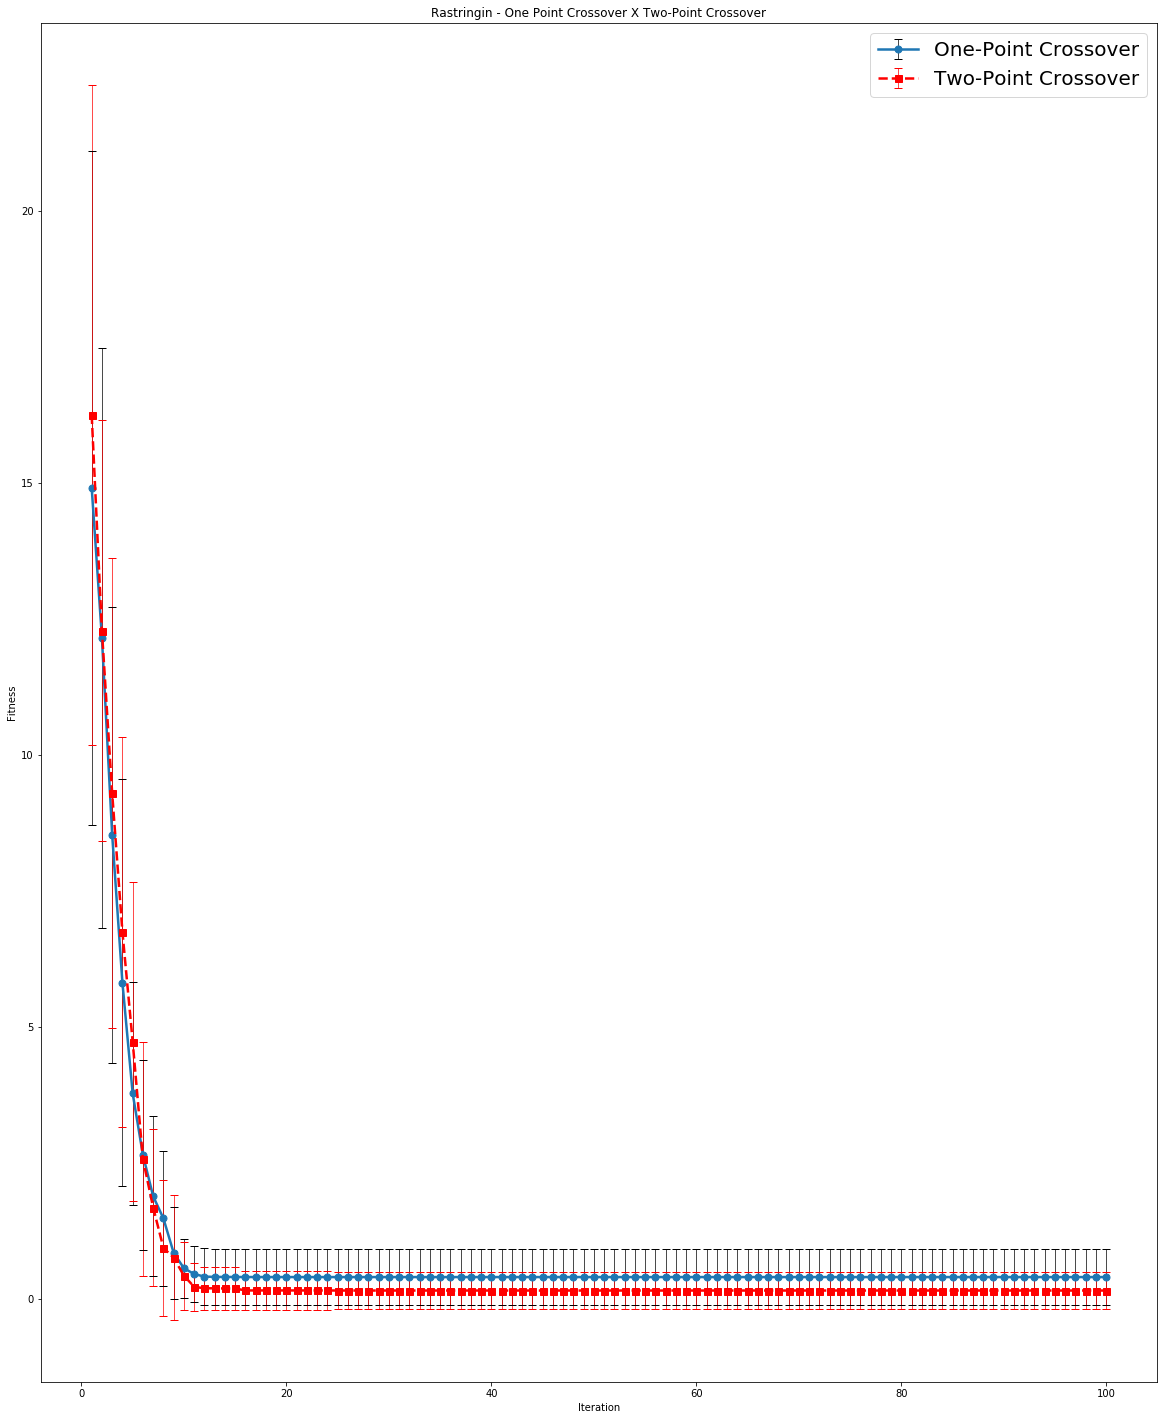

In [14]:
plt.figure(figsize=(20, 25))
plt.errorbar(x, np.array(rastringin_iter_mean_1), np.array(rastringin_iter_std_1), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label="One-Point Crossover")
plt.errorbar(x, np.array(rastringin_iter_mean_2), np.array(rastringin_iter_std_2), ms=7,ls="--", lw=2.5, marker="s", capsize=4, ecolor="red",color="r", elinewidth=0.7,label="Two-Point Crossover")
plt.title('Rastringin - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})




### Ackley

In [15]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]
ackley_best_fitnesses_1 = []
ackley_iter_results_1= [[] for i in range(num_gen)]
ackley_iter_mean_1 = []
ackley_iter_std_1 = []

ackley_best_fitnesses_2 = []
ackley_iter_results_2 = [[] for i in range(num_gen)]
ackley_iter_mean_2 = []
ackley_iter_std_2 = []

ga_1 = GA(ackley, bounds, generations=num_gen)
ga_2 = GA(ackley, bounds, generations=num_gen, cx_strategy='two-point')


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    ackley_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    ackley_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_1)):
    for j in range(len(ackley_best_fitnesses_1[i])):
        ackley_iter_results_1[j].append(ackley_best_fitnesses_1[i][j])
        ackley_iter_results_2[j].append(ackley_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_1)):
    ackley_iter_mean_1.append(np.mean(ackley_iter_results_1[i]))
    ackley_iter_std_1.append(np.std(ackley_iter_results_1[i]))
    
    ackley_iter_mean_2.append(np.mean(ackley_iter_results_2[i]))
    ackley_iter_std_2.append(np.std(ackley_iter_results_2[i]))

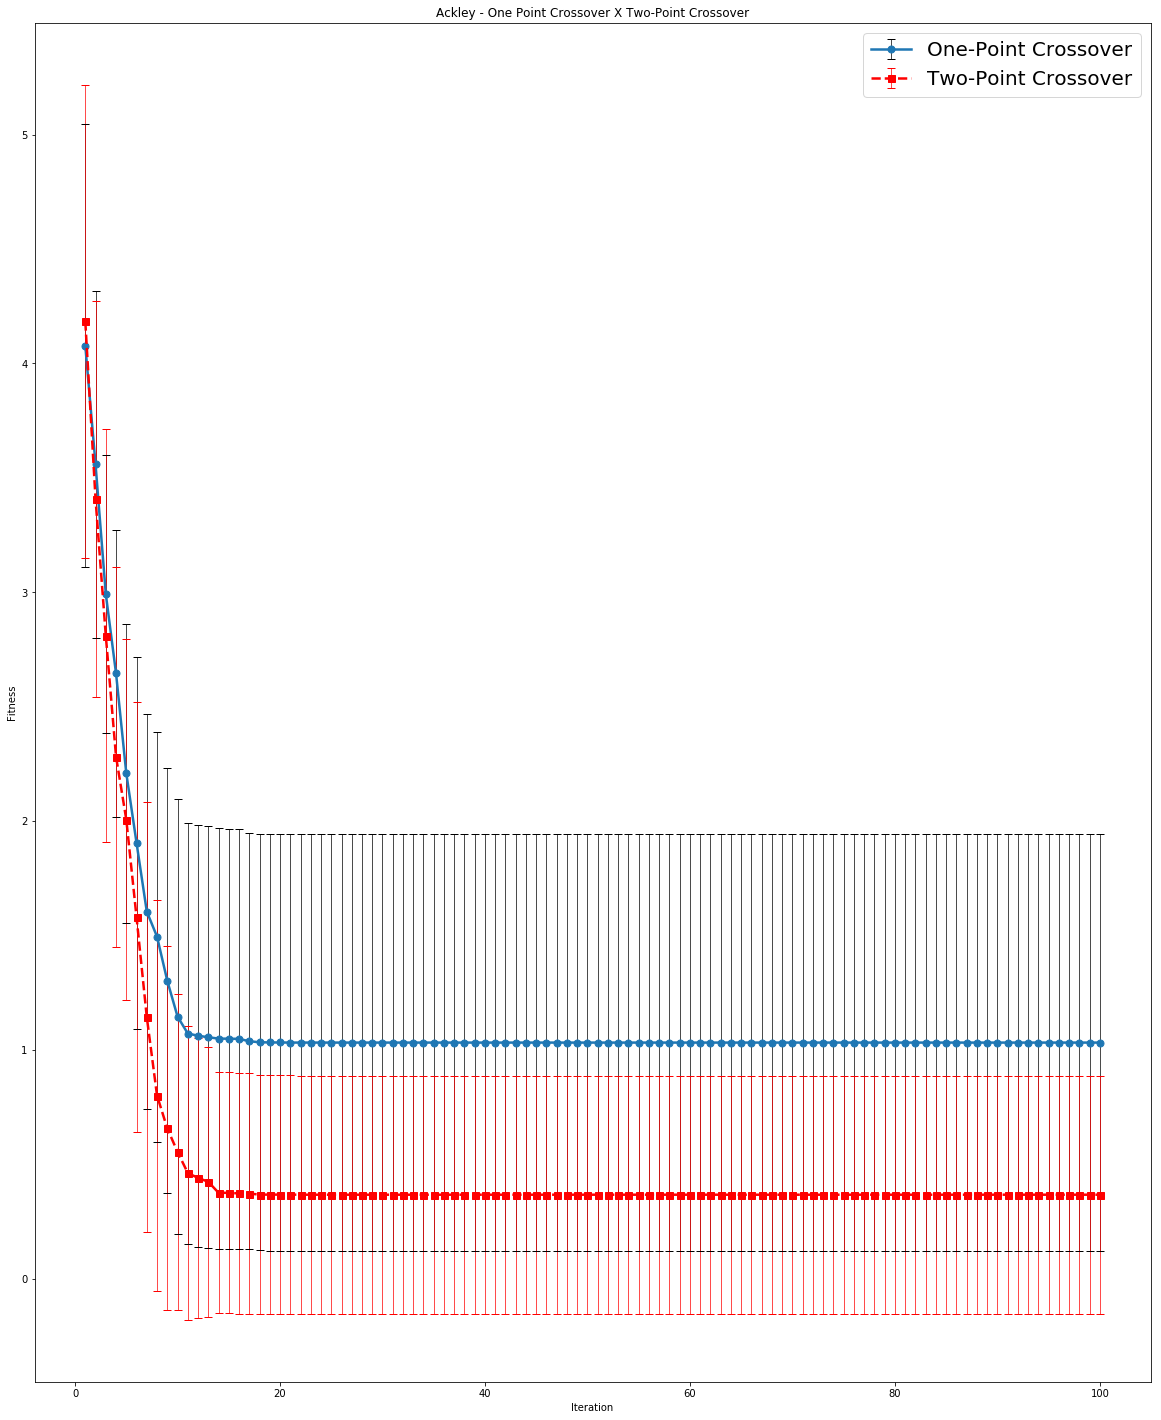

In [16]:
plt.figure(figsize=(20, 25))
plt.errorbar(x, np.array(ackley_iter_mean_1), np.array(ackley_iter_std_1), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label="One-Point Crossover")
plt.errorbar(x, np.array(ackley_iter_mean_2), np.array(ackley_iter_std_2), ms=7,ls="--", lw=2.5, marker="s", capsize=4, ecolor="red",color="r", elinewidth=0.7,label="Two-Point Crossover")
plt.title('Ackley - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})




# Variar tipo de seleção de sobrevivência entre: elitismo, roleta e aleatória
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão três séries neste gráfico, uma para cada tipo de seleção
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro.
